In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# desk top
file_path_PMMoV = r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 2\PMMoV public sheet.xlsx'
PMMoV_df = pd.read_excel(file_path_PMMoV)

file_path_weather = r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 2\Wether data.csv'
weather_df = pd.read_csv(file_path_weather)

file_path_dd = r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 2\Grandriver Daily discharge data.xlsx'
ddf= pd.read_excel(file_path_dd)

file_path_lab_user = r'C:\Users\jrruh\OneDrive\Documents\Homework\Data Sciance\CSME 830\Project 2\Extraction data.xlsx'
lab_df = pd.read_excel(file_path_lab_user)

# # laptop
# file_path_PMMoV = r'C:\Users\jackz\Documents\Homework\Data Sciance\830\Project 2\PMMoV public sheet.xlsx'
# PMMoV_df = pd.read_excel(file_path_PMMoV)

# file_path_weather = r'C:\Users\jackz\Documents\Homework\Data Sciance\830\Project 2\Wether data.csv'
# weather_df = pd.read_csv(file_path_weather)

# file_path_dd = r'C:\Users\jackz\Documents\Homework\Data Sciance\830\Project 2\Grandriver Daily discharge data.xlsx'
# ddf= pd.read_excel(file_path_dd)

# file_path_lab_user = r'C:\Users\jackz\Documents\Homework\Data Sciance\830\Project 2\Extraction data.xlsx'
# lab_df = pd.read_excel(file_path_lab_user)

In [3]:
PMMoV_df

,Date,Code,Mean CT,PMMoV (gc/ 100mL),FlowRate (MGD),pH,Temp,N1,N2,Pi6
0,2022-09-15,CS,27.51400,2260000.0,0.462,7.07,18.3,3136.000000,2026.666667,85760.00000
1,2022-09-15,GG,28.04300,1930000.0,NaN,NaN,NaN,3546.666667,4266.666667,93333.33333
2,2022-09-15,GO,27.94500,1980000.0,NaN,NaN,NaN,16128.000000,12544.000000,90624.00000
3,2022-11-03,CS,26.86500,378000.0,NaN,7.10,11.2,3720.000000,3648.000000,NaN
4,2022-11-03,GG,26.48500,375000.0,NaN,NaN,NaN,6906.000000,6720.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
1134,2024-10-24,GO,28.90394,1930000.0,3.7393,NaN,NaN,1800.000000,0.000000,14066.86554
1135,2024-10-24,GR,27.24415,4240000.0,37.4,NaN,NaN,2632.180082,0.000000,15557.75578
1136,2024-10-24,WB,29.81424,971000.0,2.713,8.20,NaN,1680.000000,0.000000,3678.49968
1137,2024-10-24,WK,26.73547,6220000.0,1.816,8.20,NaN,3783.589643,0.000000,17255.41916


In [4]:
px.scatter(PMMoV_df, 
           title = 'sewer water Temp',
           x=PMMoV_df['Date'], 
           y=PMMoV_df['Temp'],
           render_mode='svg')

In [5]:
px.scatter(PMMoV_df, 
           title = 'sewer water pH',
           x=PMMoV_df['Date'], 
           y=PMMoV_df['pH'],
           color =PMMoV_df['Code'],
           render_mode='svg')

In [6]:
px.scatter(PMMoV_df, 
           title = 'sewer water Flow rate',
           x=PMMoV_df['Date'], 
           y=PMMoV_df['FlowRate (MGD)'],
           color =PMMoV_df['Code'],
           render_mode='svg')

In [7]:
px.scatter(PMMoV_df, 
           title = 'Sewer Water PMMoV (CT)',
           x=PMMoV_df['Date'], 
           y=(PMMoV_df['Mean CT']),
           color =PMMoV_df['Code'],
           render_mode='svg')

In [8]:
px.scatter(PMMoV_df, 
           title = 'Sewer Water PMMoV (gc/100mL)',
           x=PMMoV_df['Date'], 
           y= np.log(PMMoV_df['PMMoV (gc/ 100mL)']),
           color =PMMoV_df['Code'],
           render_mode='svg')


In [9]:
# weather data exploration
weather_df.info()
weather_df['DATE'] = weather_df['DATE'].astype('datetime64[ns]')
# print(weather_df)
# px.scatter(weather_df, 
#            title = 'Daily Precipitation at Grand Rapids station (in)',
#            x=weather_df['DATE'], 
#            y=weather_df['PRCP (Rain fall in)'],
#            render_mode='svg')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STATION                        1029 non-null   object 
 1   NAME                           1029 non-null   object 
 2   DATE                           1029 non-null   object 
 3   PRCP (Rain fall in)            1029 non-null   float64
 4   SNOW                           1029 non-null   float64
 5   SNWD (Snow Depth)              1029 non-null   int64  
 6   TMAX (Max Temp F)              1029 non-null   int64  
 7   TMIN (Min Temp F)              1029 non-null   int64  
 8   TOBS (Time Observation Error)  1029 non-null   int64  
 9   WT01 (Fog)                     491 non-null    float64
 10  WT03 (Thunder)                 92 non-null     float64
 11  WT04 (Hail)                    4 non-null      float64
 12  WT06 (Frezzing rain)           11 non-null     f

In [10]:
# discharge data exploration
ddf

# encodings are next to the number in the discharge column that need to be move to its own column
# form a new column called Measured that indicates if the number in discharge was recorded or predicted
# ddf['Measured'] = np.zeros(1031)

# check the discharge column, if it contains an A give it a measure code of 1, if its a P give it a measure score of 0
# Just merged code together
ddf['Measured'] = np.where(ddf['Discharge (ft^3/s)'].str.contains("A"), 1, 0)
# remove letters from the discharge column
ddf['Discharge (ft^3/s)'] = ddf['Discharge (ft^3/s)'].str.replace(r'[^\d]', '', regex=True)

ddf



,Date,Discharge (ft^3/s),Measured
0,2022-01-01,4760,1
1,2022-01-02,4960,1
2,2022-01-03,5050,1
3,2022-01-04,4760,1
4,2022-01-05,4630,1
...,...,...,...
1026,2024-10-23,1440,0
1027,2024-10-24,1450,0
1028,2024-10-25,1470,0
1029,2024-10-26,1520,0


In [11]:
# show no missing values exist in the data
ddf_na = (ddf.isna()).sum(axis=1)
(ddf_na == 1).sum()

0

In [12]:
ddf['Discharge (ft^3/s)']=ddf['Discharge (ft^3/s)'].apply(pd.to_numeric)

px.scatter(ddf, 
           title = 'Daily mean Water Discharge of the Grand River At Grand Rapids station (ft^3/s)',
           x=ddf['Date'], 
           y=ddf['Discharge (ft^3/s)'],
           render_mode='svg')

In [13]:
# creation of a master df

# load in encoders
le = LabelEncoder()

# Create a new df with dates ranging from (1/1/2022 to 10/27/2024)
env_PMMoV_df = pd.DataFrame()
env_PMMoV_df['Date'] = pd.date_range(start='1/1/2022', end='10/27/2024')

# removed entry column but might add back later?
# env_PMMoV_df['Entry'] = le.fit_transform(env_PMMoV_df['Date'])

# merge all data onto date
env_PMMoV_df = env_PMMoV_df.merge(PMMoV_df, left_on='Date', right_on='Date',how='outer')
env_PMMoV_df = env_PMMoV_df.merge(weather_df, left_on='Date', right_on='DATE',how='outer')
env_PMMoV_df = env_PMMoV_df.merge(ddf, left_on='Date', right_on='Date',how='outer')
env_PMMoV_df = env_PMMoV_df.drop(columns=["STATION", "NAME", "DATE","Measured","WT04 (Hail)","WT06 (Frezzing rain)"])

# bianary encodeing for sites if needed
df_temp = pd.get_dummies(env_PMMoV_df["Code"])
df_temp = df_temp.astype(int)
env_PMMoV_df[["CS","GG","GO","GR","WB","WK","WY"]] = df_temp

# reorder columns for viewing
# env_PMMoV_df = env_PMMoV_df.iloc[:,[0,1,19,20,21,22,23,24,25,2,3,7,8,9,5,6,13,14,4,18,10,11,12,15,16,17]]
env_PMMoV_df = env_PMMoV_df.drop(columns=["TOBS (Time Observation Error)"])

# Fix for a minor formatting problem in column PMMoV (gc/ 100mL)
# env_PMMoV_df['PMMoV (gc/ 100mL)'] = env_PMMoV_df['PMMoV (gc/ 100mL)'].apply('{:.2f}'.format)
# env_PMMoV_df['PMMoV (gc/ 100mL)'] = env_PMMoV_df['PMMoV (gc/ 100mL)'].astype(float)

# View full df
print(env_PMMoV_df.to_string())

           Date Code    Mean CT  PMMoV (gc/ 100mL) FlowRate (MGD)    pH  Temp            N1            N2            Pi6  PRCP (Rain fall in)  SNOW  SNWD (Snow Depth)  TMAX (Max Temp F)  TMIN (Min Temp F)  WT01 (Fog)  WT03 (Thunder)  Discharge (ft^3/s)  CS  GG  GO  GR  WB  WK  WY
0    2022-01-01  NaN        NaN                NaN            NaN   NaN   NaN           NaN           NaN            NaN                 0.03   0.0                1.0               37.0               32.0         1.0             NaN                4760   0   0   0   0   0   0   0
1    2022-01-02  NaN        NaN                NaN            NaN   NaN   NaN           NaN           NaN            NaN                 0.33   4.7                5.0               32.0               16.0         1.0             NaN                4960   0   0   0   0   0   0   0
2    2022-01-03  NaN        NaN                NaN            NaN   NaN   NaN           NaN           NaN            NaN                 0.00   0.0          

In [14]:
# One thing I would like to point out in the data is the detection limit. The sensor can only accurately detect ranges with in a specific range. If the range is exceed, then the result can not be trusted
# set the Mean CT threshold
Mean_CT_threshold = 32
PMMoV_100_threshold = 100000 # 1x10^5
# Replace values greater than the threshold in column 'x' with NaN (ChatGPT4o mini code (11/20/2024))
env_PMMoV_df['Mean CT'] = env_PMMoV_df['Mean CT'].apply(lambda x: np.nan if x > Mean_CT_threshold else x)
env_PMMoV_df['PMMoV (gc/ 100mL)'] = env_PMMoV_df['PMMoV (gc/ 100mL)'].apply(lambda x: np.nan if x < PMMoV_100_threshold else x)
env_PMMoV_df.describe()

,Date,Mean CT,PMMoV (gc/ 100mL),pH,Temp,N1,N2,Pi6,PRCP (Rain fall in),SNOW,...,WT01 (Fog),WT03 (Thunder),Discharge (ft^3/s),CS,GG,GO,GR,WB,WK,WY
count,1960,1130.000000,1.126000e+03,426.000000,156.000000,1.139000e+03,1.139000e+03,1098.000000,1958.000000,1958.000000,...,875.0,194.0,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000
mean,2023-09-02 06:46:17.142856960,27.296401,5.116389e+06,7.645070,14.932692,1.052844e+04,7.348753e+03,70499.583027,0.111823,0.149898,...,1.0,1.0,4177.214286,0.081633,0.083673,0.082653,0.087755,0.082653,0.080612,0.082143
min,2022-01-01 00:00:00,24.193290,1.058991e+05,6.000000,7.700000,4.800000e+02,0.000000e+00,840.000000,0.000000,0.000000,...,1.0,1.0,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-03-01 18:00:00,26.660726,2.562500e+06,7.212500,11.400000,1.687283e+03,1.200000e+03,22416.000000,0.000000,0.000000,...,1.0,1.0,2360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023-10-05 12:00:00,27.174500,4.390000e+06,7.800000,14.300000,3.534000e+03,2.274133e+03,56773.333335,0.000000,0.000000,...,1.0,1.0,3375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-04-15 06:00:00,27.849397,6.667500e+06,8.000000,18.400000,8.025333e+03,5.305600e+03,100100.000025,0.070000,0.000000,...,1.0,1.0,4810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024-10-27 00:00:00,31.956600,4.450000e+07,9.000000,22.900000,1.610400e+06,1.205600e+06,410133.333300,2.720000,11.900000,...,1.0,1.0,26700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,1.003993,3.953072e+06,0.459469,3.640740,5.520437e+04,4.195001e+04,62045.525149,0.306233,0.803688,...,0.0,0.0,3077.019184,0.273874,0.276968,0.275427,0.283011,0.275427,0.272308,0.274652


In [15]:
# looking over the Main df and the univariable graphs it seams like I need to split each graph by test site and do imputation and analysis that way
# test site consents appear to highly impact the normal state the sewer environment and cant be compared to one another unless controlled for.

# split the main df "env_PMMoV_df" six site dfs

splits = list(env_PMMoV_df.groupby("Code")) 
  
# # view splitted dataframe 
# print(splits[5][1])

# CS
CS_df = splits[0][1]
CS_df = CS_df.reset_index()
CS_df = CS_df.drop(columns = ['index','CS','GO','GG','GR','WB','WK','WY'])

# GG
GG_df = splits[1][1]
GG_df = GG_df.reset_index()
GG_df = GG_df.drop(columns = ['index','CS','GO','GG','GR','WB','WK','WY','pH'])

# GO
GO_df = splits[2][1]
GO_df = GO_df.reset_index()
GO_df = GO_df.drop(columns = ['index','CS','GO','GG','GR','WB','WK','WY','pH'])

# GR
GR_df = splits[3][1]
GR_df = GR_df.reset_index()
GR_df = GR_df.drop(columns = ['index','CS','GO','GG','GR','WB','WK','WY','pH'])

# WB
WB_df = splits[4][1]
WB_df = WB_df.reset_index()
WB_df = WB_df.drop(columns = ['index','CS','GO','GG','GR','WB','WK','WY'])

# WK
WK_df = splits[5][1]
WK_df = WK_df.reset_index()
WK_df = WK_df.drop(columns = ['index','CS','GO','GG','GR','WB','WK','WY'])

# WY
WY_df = splits[6][1]
WY_df = WY_df.reset_index()
WY_df = WY_df.drop(columns = ['index','CS','GO','GG','GR','WB','WK','WY','pH'])

In [16]:
# looking through .describe to see how each data frame is structured

CS_df.describe()
# GG_df.describe() # insufficient Water temp and pH recorded
# GO_df.describe() # insufficient Water temp and pH recorded
# GR_df.describe() # insufficient Water temp and pH recorded
# WB_df.describe() # insufficient Water temp
# WK_df.describe() # insufficient Water temp
# WY_df.describe() # no Water temp and insufficient pH recorded

# only the CS_df has sufficient recorded environmental conditions for analysis

,Date,Mean CT,PMMoV (gc/ 100mL),pH,Temp,N1,N2,Pi6,PRCP (Rain fall in),SNOW,SNWD (Snow Depth),TMAX (Max Temp F),TMIN (Min Temp F),WT01 (Fog),WT03 (Thunder),Discharge (ft^3/s)
count,160,154.000000,1.540000e+02,156.000000,154.000000,160.000000,160.000000,154.000000,160.000000,160.000000,160.000000,160.000000,160.000000,69.0,19.0,160.000000
mean,2023-12-18 15:09:00,28.096914,2.642271e+06,7.147756,15.026623,7334.619970,5388.756907,77126.263379,0.121813,0.098750,0.375000,63.462500,42.381250,1.0,1.0,4200.562500
min,2022-09-15 00:00:00,25.485519,1.190000e+05,6.760000,9.600000,600.000000,0.000000,840.000000,0.000000,0.000000,0.000000,13.000000,4.000000,1.0,1.0,1200.000000
25%,2023-07-09 00:00:00,27.475023,1.347048e+06,7.020000,11.650000,1200.000000,982.687949,24001.113725,0.000000,0.000000,0.000000,48.000000,30.750000,1.0,1.0,2495.000000
50%,2024-01-05 12:00:00,27.947510,2.290000e+06,7.160000,14.300000,1743.466667,1344.000000,59200.000000,0.000000,0.000000,0.000000,67.500000,42.500000,1.0,1.0,3555.000000
75%,2024-05-30 06:00:00,28.573837,3.565000e+06,7.242500,18.400000,3686.000000,2693.374006,113973.333325,0.100000,0.000000,0.000000,78.000000,55.000000,1.0,1.0,4782.500000
max,2024-10-23 00:00:00,31.878000,1.460000e+07,7.790000,22.900000,511541.333300,426890.666700,382480.000000,2.720000,6.200000,13.000000,92.000000,72.000000,1.0,1.0,24100.000000
std,NaN,1.077689,1.942520e+06,0.149720,3.568692,40891.198252,33778.908631,66671.144272,0.345255,0.565795,1.743812,18.215995,14.274872,0.0,0.0,3170.621876


<Axes: >

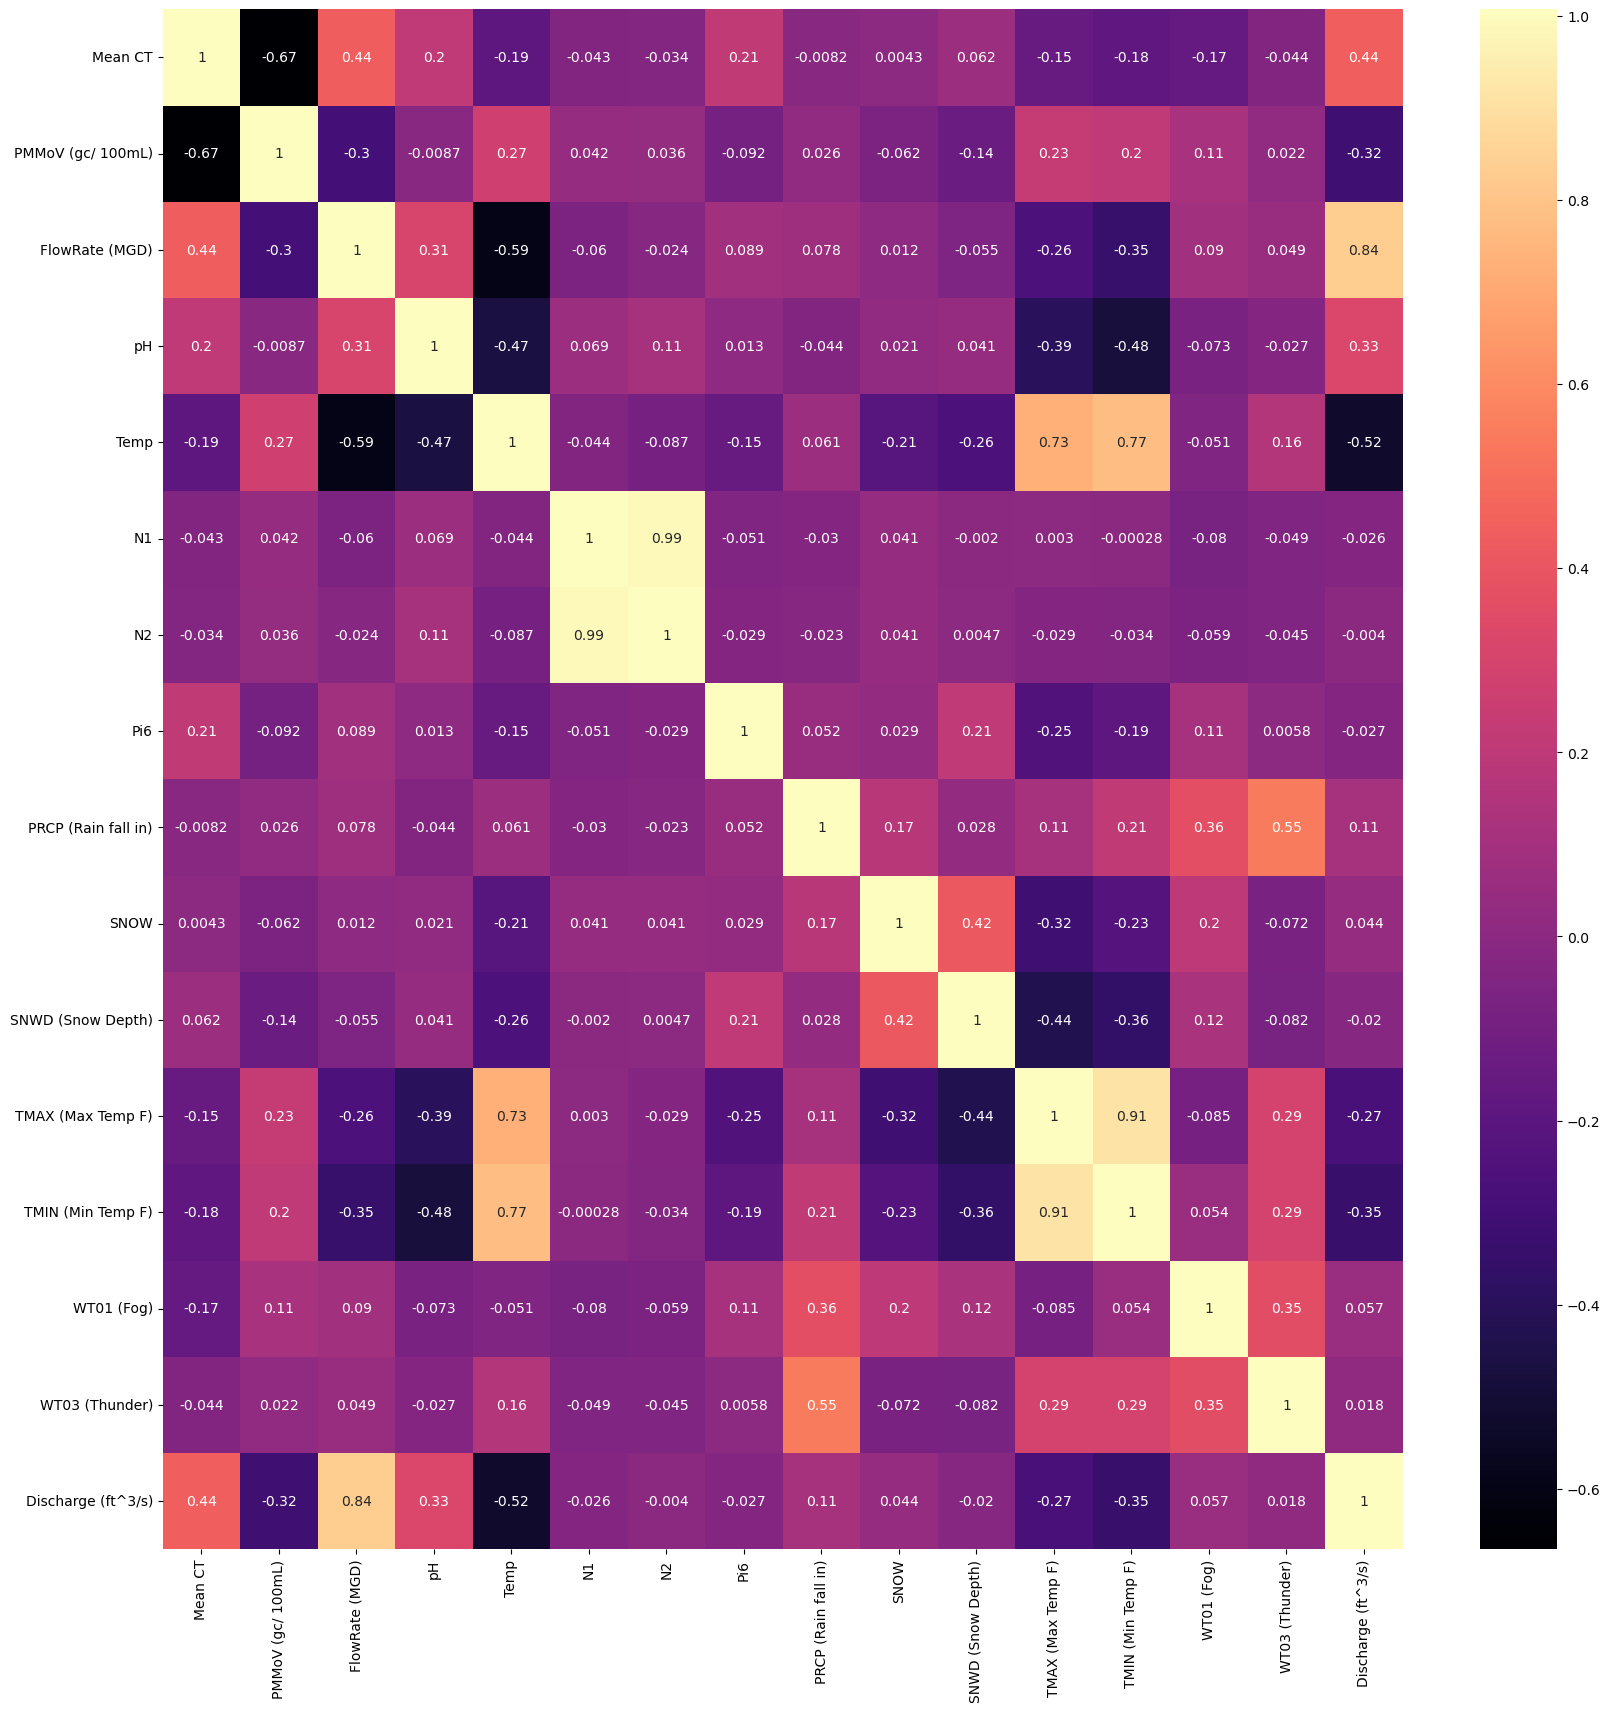

In [17]:
# Generate a Cov matrix
# impute bianary wther data to 1s and 0s
CS_df['WT01 (Fog)'] = CS_df['WT01 (Fog)'].fillna(0)
CS_df['WT03 (Thunder)'] = CS_df['WT03 (Thunder)'].fillna(0)

# remove non integer columns
CS_NO_Objects = CS_df.drop(columns= ['Date','Code'])
CS_NO_Objects_NONA = CS_NO_Objects.dropna()

# Scale the remaining data
CS_scaled_NONA = StandardScaler().fit_transform(CS_NO_Objects_NONA)
CS_cov_NONA = np.cov(CS_scaled_NONA.T)

# re introduce column names since they got lost after scaling the data
CS_cov_heatmap = pd.DataFrame(CS_cov_NONA, columns = CS_NO_Objects_NONA.columns)
plt.figure(figsize=(20,20))
sns.heatmap(CS_cov_heatmap, annot=True, cmap = 'magma', xticklabels=CS_cov_heatmap.columns, yticklabels=CS_cov_heatmap.columns)

Made a rough correlation matrix heatmap to help gets some ideas across. 
We want to pay attention to specific the environmental factors that correlate with Mean CT and PMMoV Gene Counts.
I need to check the original lab data but PMMoV gene Counts is the result of the flowing equation...
$$ PMMoV (gc / 100ml) = f(CT)\frac{100000\mu L}{100mL}*\frac{1}{\mu L\ sample\ used (5 \mu L)}* Dilution\ factor$$
where 
* f(CT) = The function that converts a qPCR CT value to gene counts in sample.
* phi6 = The control virus. phi6 is used to predict viral recovery loss in the lab. a known amount of phi6 is used before the extraction and is measured after the extraction.
the phi6 ratio is used to calculate the loss of our virus of interest.
* uL/mL = unit conversion
* Dilution factor = Some ratio the original sample has been diluted by as to not overload the machines scanner.

The equation can be simplified into constance where
$$ PMMoV (gc / 100ml) = \frac{f(CT)}{phi6\ ratio}*Unit\ consent * Dilution\ factor$$
* CT is also inversely related to the gene count, where the smaller the CT value the larger the gene count.

N1 and N2 are two tests that find calculate the gene count for the same virus. In other words N1 and N2 are practically the same number.
Other highly similar correlations are Flowrate of a sewer system and the discharge of the Grandriver. I do not know why these values are so correlated but I suspect The Grandriver is related to groundwater and groundwater is related to Flowrate of a sewer system.
Another highly similar correlation is water temp and the temperature outside (truly ground braking stuff).
For sites missing flow rate data or water temperature data, we can predict what those values could have been on any day using the grand river discharge and the temperature outside on any given day.

When looking at the heatmap we see Mean CT values are positively correlated with phi6 counts, pH, and Flowrate/discharge while being negatively correlated with the temperature of the water.
When thinking about the predicted sample PMMoV counts the relationship of mean CT should be inversely correlated to the mean CT correlations but this is not 100% what we see.
PMMoV counts are way less correlated to pH than the CT values; why? I suspect there is a confounder variable at play that controls phi6 recovery, which inturn controls the PMMoV counts.

The flowing steps are required for moving forward...
1. Impute Flowrate and temperature values for all sites
2. Find the true effect pH, Temperature, and Flow rate have on Mean CT and phi6

          Date Code    Mean CT  PMMoV (gc/ 100mL) FlowRate (MGD)    pH  \
0   2022-09-15   CS  27.514000          2260000.0          0.462  7.07   
1   2022-11-03   CS  26.865000           378000.0            NaN  7.10   
2   2022-12-19   CS  27.276000           464000.0          0.474  6.96   
3   2022-12-29   CS  28.533000           530000.0            NaN   NaN   
4   2023-01-05   CS  29.201000           132000.0          0.686  7.01   
..         ...  ...        ...                ...            ...   ...   
159 2024-10-09   CS  26.519979          6940000.0          0.338  7.18   
160 2024-10-14   CS  28.112290          3100000.0           0.35  7.02   
161 2024-10-16   CS  28.081900          2480000.0          0.363  7.03   
162 2024-10-21   CS  27.815000          1840000.0           0.36  6.84   
163 2024-10-23   CS  27.789930          3530000.0          0.376  7.04   

              N1           N2           Pi6  PRCP (Rain fall in)  SNOW  \
0    3136.000000  2026.666667   85760

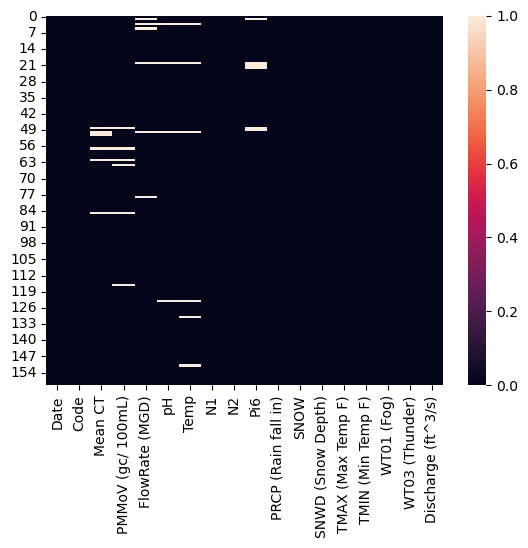

In [18]:
# imputation of temperature
# We only have one site that has water temperature, since all sites are close geographic its safe to assume the water temperature of a single site is the same temperature of all sites
    # heatmap only works on non-imputed data
sns.heatmap(CS_df.isna().astype(int))

CS_df['Temp'] = CS_df['Temp'].ffill()
# # temperature is missing for a few dates so I will impute temperature by using KNN
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=2)
# CS_df['Temp'] = imputer.fit_transform(CS_df[['Temp']])

# Chat GPT4o mini (11/16/2024) created a loop that will replace all Temp columns with the temp column from CS_df
dfs = [CS_df,GG_df, GO_df, GR_df, WB_df, WK_df, WY_df]

# Select the Temp column from the CS_df
source_df = CS_df[['Date', 'Temp']]

# Loop over all target DataFrames and replace the Temp column
for i, target_df in enumerate(dfs):
    dfs[i] = target_df.drop('Temp', axis=1).merge(source_df[['Date', 'Temp']], on='Date', how='left')
    # Temp transfer was not 1:1 so KNN was used to imputate any missing information
    dfs[i][('Temp')] = dfs[i][[('Temp')]].ffill()

# The flowing code created duplicates for unknown reason. I think I know why it happened but im not 100% sure. The Following code should fix the problem
CS_df = dfs[0]
CS_df = CS_df.drop_duplicates()
dfs[0] = CS_df

GG_df = dfs[1]
GG_df = GG_df.drop_duplicates()
dfs[1] = GG_df

GO_df = dfs[2]
GO_df = GO_df.drop_duplicates()
dfs[2] = GO_df

GR_df = dfs[3]
GR_df = GR_df.drop_duplicates()
dfs[3] = GR_df

WB_df = dfs[4]
WB_df = WB_df.drop_duplicates()
dfs[4] = WB_df

WK_df = dfs[5]
WK_df = WK_df.drop_duplicates()
dfs[5] = WK_df

WY_df = dfs[6]
WY_df = WY_df.drop_duplicates()
dfs[6] = WY_df
print(CS_df)

# check to see if the imputation makes sense
# px.scatter(WK_df, 
#            title = 'sewer water Temp',
#            x=PMMoV_df['Date'], 
#            y=PMMoV_df['Temp'],
#            render_mode='svg')

# Water temp imputed data looks good

Matrix W = [28.27511404690854 0.002281922106793845]
Slope w1 = 0.002281922106793842
Intercept w1 = 28.275114046908534
Pearson correlation coefficient r value = 0.871823847760505
p-value = 8.070617692650082e-37
standard error value = 0.00012060601074434239


<Axes: >

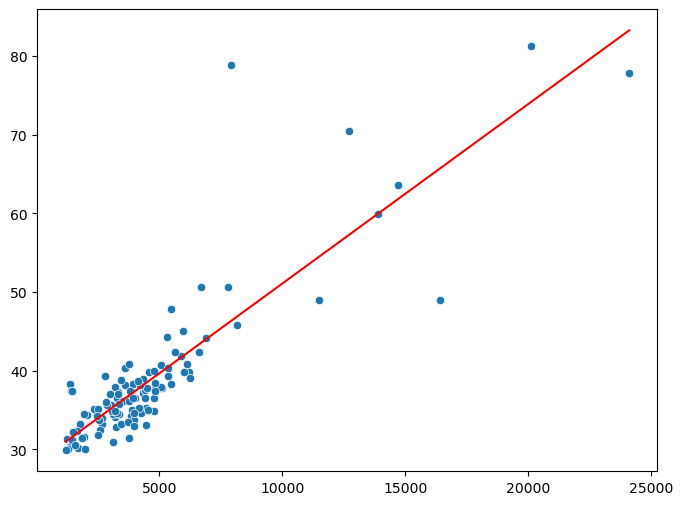

In [19]:
# Next column of data that needs imputation is the Flow rate column. Flow rate is highly correlated with the discharge of the grand river at Grand rapids monitoring station.
# Each site has its own base flow rate that correlates with grand river discharge
# I will attempt to fill in the missing data using a liner regression model for each site
# lets start by identifying the model using site GR

GR_temp = GR_df.dropna(subset=['FlowRate (MGD)', 'Discharge (ft^3/s)'])
# # plot GR flowrate vs discharge of grand river
# plt.figure(figsize=(8, 6)) 
# sns.scatterplot(x='Discharge (ft^3/s)', y='FlowRate (MGD)', data=GR_temp)

# our plotted data looks like it fits a liner model 
# The liner model will be GR[flow rate] = w0 + w1*Discharge of Grand river
from scipy import stats

GR_FR = np.array(GR_temp['FlowRate (MGD)'])
GR_D = np.array(GR_temp['Discharge (ft^3/s)'])
GR_D1 = GR_D
GR_D1 = GR_D1[:, np.newaxis]  # Alternatively: vector.reshape(-1, 1)

# First I will do the regression manually using matrix multiplication then I will do regression using stats.linregress

# manual matrix regression
# Create a column of ones with the same number of rows as the original vector (this new column is nessisary for manual liner regression)
ones_column = np.ones((GR_D1.shape[0], 1))
GR_D1 = np.hstack((ones_column, GR_D1))
# print(GR_D1)
W = np.linalg.pinv(GR_D1) @ GR_FR
print('Matrix W =',W)

# Stats linregress
w1, w0, r, p, err = stats.linregress(GR_D.astype(float),GR_FR.astype(float))

print("Slope w1 =",w1)
print("Intercept w1 =",w0)
print("Pearson correlation coefficient r value =",r)
print("p-value =",p)
print("standard error value =",err)
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x=GR_D, y=GR_FR, data=GR_temp)
sns.lineplot(x=GR_D, y=(GR_D*w1 + w0), color = "red")

<Axes: xlabel='Discharge (ft^3/s)', ylabel='FlowRate (MGD)'>

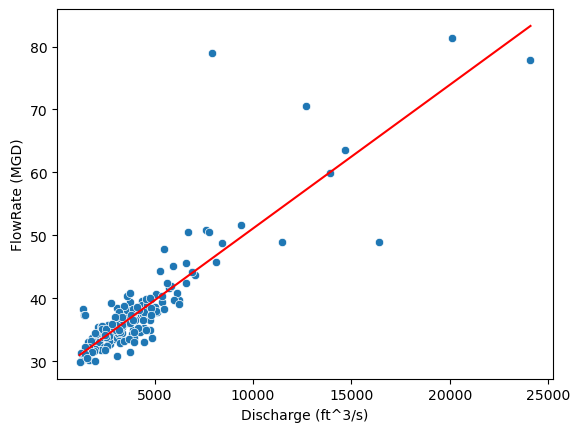

In [20]:
# Now we have consistent weights for w1 and w0 as well as a corelation coefficient, p-value, and standard error
# We want to now impute the missing flow rate data using the regression model
GR_df_mfr = GR_df[GR_df['FlowRate (MGD)'].isna()].index

# add noise to the formula so that flow rate is not 1:1 with discharge
np.random.seed(0)
mu = 1
noise_level = 0.2

for idx in GR_df_mfr:
    noise = np.random.normal(mu, noise_level)
    fr_predict = w1*GR_df.loc[idx, 'Discharge (ft^3/s)']*noise + w0
    GR_df.loc[idx, 'FlowRate (MGD)'] = round(fr_predict, 3)

# plot flow rate vs discharge and flow rate over time
sns.scatterplot(x=GR_df['Discharge (ft^3/s)'], y=GR_df['FlowRate (MGD)'], data=GR_df)
sns.lineplot(x=GR_D, y=(GR_D*w1 + w0), color = "red")


In [21]:
px.scatter(GR_df, 
           title = 'sewer water Flow rate',
           x=GR_df['Date'], 
           y=GR_df['FlowRate (MGD)'],
           render_mode='svg')

In [22]:
# find the new correlation coefficient for the imputed data

GR_FR_temp = np.array(GR_df['FlowRate (MGD)'])
GR_D_temp = np.array(GR_df['Discharge (ft^3/s)'])

w1_temp, w0_temp, r_temp, p_temp, err_temp = stats.linregress(GR_D_temp.astype(float),GR_FR_temp.astype(float))

print("Predicted Slope w1 =",w1)
print("Imputed Slope w1 =",w1_temp)
print("delta w1",w1-w1_temp)
print("\nPredicted Intercept w0 =",w0)
print("Imputed Intercept w0 =",w0_temp)
print("delta w0",w0-w0_temp)
print("\nPredicted Pearson correlation coefficient r value =",r)
print("Imputed Pearson correlation coefficient r value =",r_temp)
print("delta r",r-r_temp)
print("\nPredicted p-value =",p)
print("Imputed p-value =",p_temp)
print("delta p",p-p_temp)
print("\nPredicted Standard error value =",err)
print("Imputed Standard error value =",err_temp)
print("delta err",err-err_temp)

# our results table tells us the change in our predicted liner regression between the predicted and imputed data.
# This table was mostly used to provide information on how the correlation coefficient changed so that the noise level can be adjusted

Predicted Slope w1 = 0.002281922106793842
Imputed Slope w1 = 0.002294680841381097
delta w1 -1.275873458725504e-05

Predicted Intercept w0 = 28.275114046908534
Imputed Intercept w0 = 28.27329426340155
delta w0 0.0018197835069848622

Predicted Pearson correlation coefficient r value = 0.871823847760505
Imputed Pearson correlation coefficient r value = 0.880623449365511
delta r -0.008799601605005924

Predicted p-value = 8.070617692650082e-37
Imputed p-value = 4.946897689718704e-57
delta p 8.070617692650082e-37

Predicted Standard error value = 0.00012060601074434239
Imputed Standard error value = 9.46930313725949e-05
delta err 2.5912979371747497e-05


In [23]:
# now that we have a method of imputing a systems flow rate we need to impute all dfs in a loop and collect there regression variables
dfs = dfs
np.random.seed(0)
mu = 1
noise_level = 0.2

for idx, df in enumerate(dfs):
    temp_df = df.dropna(subset=['FlowRate (MGD)', 'Discharge (ft^3/s)'])
    
    # Get the flow rate and discharge values as numpy arrays
    FR = np.array(temp_df['FlowRate (MGD)'])
    D = np.array(temp_df['Discharge (ft^3/s)'])
    w1, w0, r, p, err = stats.linregress(D.astype(float), FR.astype(float))
    missing_FR_indices = df[df['FlowRate (MGD)'].isna()].index

    for idx in missing_FR_indices:
        noise = np.random.normal(mu, noise_level)
        fr_predict = w1 * df.loc[idx, 'Discharge (ft^3/s)']*noise + w0
        df.loc[idx, 'FlowRate (MGD)'] = round(fr_predict, 3)
    
    FR_temp = np.array(df['FlowRate (MGD)'])
    D_temp = np.array(df['Discharge (ft^3/s)'])

    w1_temp, w0_temp, r_temp, p_temp, err_temp = stats.linregress(D_temp.astype(float), FR_temp.astype(float))

    # # print results if wanted, but they are all posted below
    # print(f"Predicted vs Imputed results for {idx}:")
    # print(f"Predicted Slope w1 = {w1:.4e}")
    # print(f"Imputed Slope w1 = {w1_temp:.4e}, delta = {w1 - w1_temp:.4e}")
    # print(f"Predicted Intercept w0 = {w0:.4e}")
    # print(f"Imputed Intercept w0 = {w0_temp:.4e}, delta = {w0 - w0_temp:.4e}")
    # print(f"Predicted Pearson correlation (r) = {r:.4f}")
    # print(f"Imputed Pearson correlation (r) = {r_temp:.4f}, delta = {r - r_temp:4f}")
    # print(f"Predicted p-value = {p:.4e}")
    # print(f"Imputed p-value = {p_temp:.4e}, delta = {p - p_temp:.4e}")
    # print(f"Predicted Standard error = {err:.4e}")
    # print(f"Imputed Standard error = {err_temp:.4e}, delta = {err - err_temp:.4e}")
    # print("\n")

- **Predicted vs Imputed results for CS:**
  - Predicted Slope w1 = 3.9444e-05
  - Imputed Slope w1 = 3.9517e-05, delta = -7.3047e-08
  - Predicted Intercept w0 = 3.6697e-01
  - Imputed Intercept w0 = 3.6797e-01, delta = -9.9959e-04
  - Predicted Pearson correlation (r) = 0.8258
  - Imputed Pearson correlation (r) = 0.8250, delta = 0.000785
  - Predicted p-value = 1.2262e-39
  - Imputed p-value = 5.3448e-41, delta = 1.1727e-39
  - Predicted Standard error = 2.1852e-06
  - Imputed Standard error = 2.1537e-06, delta = 3.1504e-08

- **Predicted vs Imputed results for GG:**
  - Predicted Slope w1 = 2.4370e-04
  - Imputed Slope w1 = 2.4195e-04, delta = 1.7467e-06
  - Predicted Intercept w0 = 9.6193e-01
  - Imputed Intercept w0 = 9.6410e-01, delta = -2.1755e-03
  - Predicted Pearson correlation (r) = 0.8020
  - Imputed Pearson correlation (r) = 0.8131, delta = -0.011114
  - Predicted p-value = 1.0815e-25
  - Imputed p-value = 6.5267e-40, delta = 1.0815e-25
  - Predicted Standard error = 1.7547e-05
  - Imputed Standard error = 1.3609e-05, delta = 3.9379e-06

- **Predicted vs Imputed results for GO:**
  - Predicted Slope w1 = 4.8459e-05
  - Imputed Slope w1 = 4.8243e-05, delta = 2.1598e-07
  - Predicted Intercept w0 = 3.7292e+00
  - Imputed Intercept w0 = 3.7311e+00, delta = -1.9804e-03
  - Predicted Pearson correlation (r) = 0.6090
  - Imputed Pearson correlation (r) = 0.6317, delta = -0.022651
  - Predicted p-value = 2.1185e-12
  - Imputed p-value = 2.0121e-19, delta = 2.1185e-12
  - Predicted Standard error = 6.1010e-06
  - Imputed Standard error = 4.6807e-06, delta = 1.4203e-06

- **Predicted vs Imputed results for WB:**
  - Predicted Slope w1 = 5.9076e-05
  - Imputed Slope w1 = 5.9239e-05, delta = -1.6306e-07
  - Predicted Intercept w0 = 2.7261e+00
  - Imputed Intercept w0 = 2.7273e+00, delta = -1.1928e-03
  - Predicted Pearson correlation (r) = 0.8680
  - Imputed Pearson correlation (r) = 0.8763, delta = -0.008310
  - Predicted p-value = 3.2064e-35
  - Imputed p-value = 1.3175e-52, delta = 3.2064e-35
  - Predicted Standard error = 3.2231e-06
  - Imputed Standard error = 2.5752e-06, delta = 6.4785e-07

- **Predicted vs Imputed results for WK:**
  - Predicted Slope w1 = 7.8379e-05
  - Imputed Slope w1 = 7.7841e-05, delta = 5.3787e-07
  - Predicted Intercept w0 = 1.7066e+00
  - Imputed Intercept w0 = 1.7071e+00, delta = -4.6574e-04
  - Predicted Pearson correlation (r) = 0.8872
  - Imputed Pearson correlation (r) = 0.8930, delta = -0.005785
  - Predicted p-value = 9.7497e-38
  - Imputed p-value = 5.7895e-56, delta = 9.7497e-38
  - Predicted Standard error = 3.9402e-06
  - Imputed Standard error = 3.1409e-06, delta = 7.9922e-07

- **Predicted vs Imputed results for WY:**
  - Predicted Slope w1 = 3.0058e-04
  - Imputed Slope w1 = 3.0045e-04, delta = 1.3536e-07
  - Predicted Intercept w0 = 1.2292e+01
  - Imputed Intercept w0 = 1.2290e+01, delta = 1.7976e-03
  - Predicted Pearson correlation (r) = 0.6917
  - Imputed Pearson correlation (r) = 0.6918, delta = -0.000067
  - Predicted p-value = 5.8838e-24
  - Imputed p-value = 3.0065e-24, delta = 2.8773e-24
  - Predicted Standard error = 2.5047e-05
  - Imputed Standard error = 2.4873e-05, delta = 1.7388e-07



In [24]:
# view flow rates to check imputation
# for idx, df in enumerate(dfs):
#     # Create the scatter plot for the current DataFrame
#     fig = px.scatter(
#         df, 
#         title=f'Sewer Water Flow Rate - DataFrame {idx}',  # Unique title for each DataFrame
#         x='Date',  # X-axis is Date
#         y='FlowRate (MGD)',  # Y-axis is FlowRate (MGD)
#         render_mode='svg'  # Use SVG rendering mode
#     )
    
#     # Show the plot
#     fig.show()

# imputation worked as expected


Naive Analysis (FR ~ pH):
Slope: 0.325
r-value: 0.309
P-value: 1.597e-04

Controlled Analysis (accounting for Temp):
Slope: 0.054
r-value: 0.309
P-value: 5.047e-01


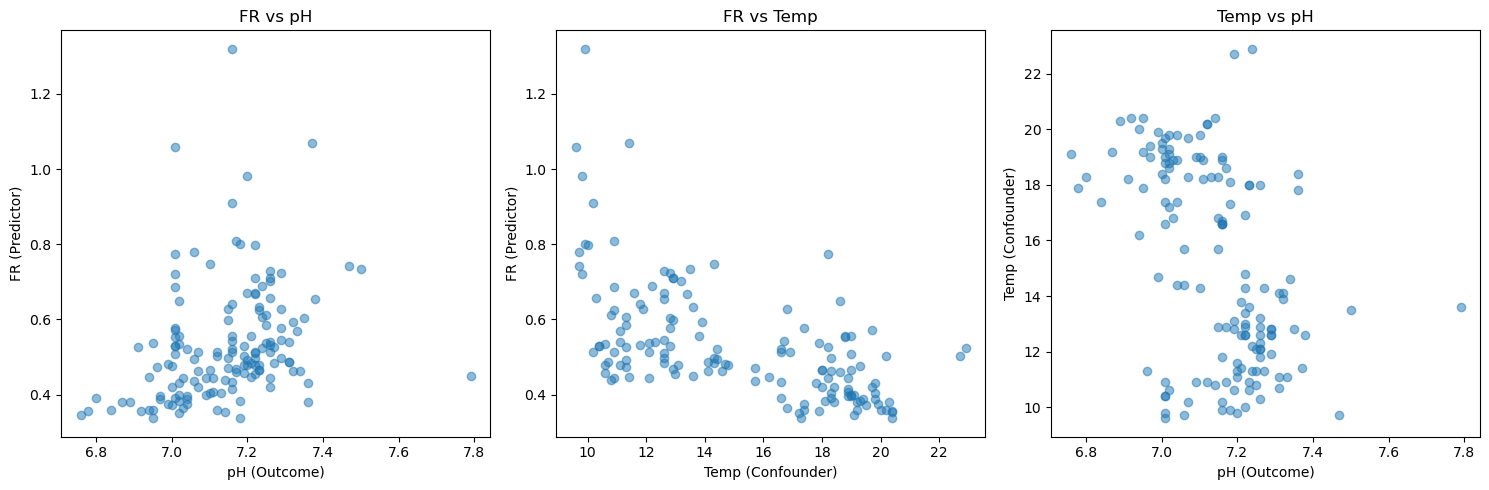

In [25]:
# pH imputation will be challenging since the pH is correlated with both temperature and flow rate of a system but temperature is a confounder that can 'in the long term' alter the flow rate of a system. 
# I want to know what has a grater effect of the variance of pH, water temperature or flowrate

# Set random seed for reproducibility
np.random.seed(0)
WK_df = dfs[5]
WK_df_NONA = CS_df.dropna()
WK_df_NONA

# Generate data
pH = WK_df_NONA['pH'] # outcome
Temp = WK_df_NONA['Temp'] # confounder
FR = WK_df_NONA['FlowRate (MGD)'] # predictor

# Create figure with plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot relationships
ax1.scatter(pH, FR, alpha=0.5)
ax1.set_xlabel('pH (Outcome)')
ax1.set_ylabel('FR (Predictor)')
ax1.set_title('FR vs pH')

ax2.scatter(Temp, FR, alpha=0.5)
ax2.set_xlabel('Temp (Confounder)')
ax2.set_ylabel('FR (Predictor)')
ax2.set_title('FR vs Temp')

ax3.scatter(pH, Temp, alpha=0.5)
ax3.set_xlabel('pH (Outcome)')
ax3.set_ylabel('Temp (Confounder)')
ax3.set_title('Temp vs pH')

plt.tight_layout()

# Naive Analysis: regressing y on x directly
naive_model = stats.linregress(pH.astype(float), FR.astype(float))
print("\nNaive Analysis (FR ~ pH):")
print(f"Slope: {naive_model.slope:.3f}")
print(f"r-value: {naive_model.rvalue:.3f}")
print(f"P-value: {naive_model.pvalue:.3e}")

# Controlled Analysis
# Step 1: Get residuals of x after controlling for z
model_pH_Temp = stats.linregress(Temp.astype(float), pH.astype(float))
predicted_pH = model_pH_Temp.slope * Temp + model_pH_Temp.intercept
residuals_pH = pH - predicted_pH

# Step 2: Get residuals of y after controlling for z
model_FR_Temp = stats.linregress(Temp.astype(float), pH.astype(float))
predicted_FR = model_FR_Temp.slope * Temp + model_FR_Temp.intercept
residuals_FR = FR - predicted_FR

# Step 3: Regress residuals to get controlled effect
controlled_model = stats.linregress(residuals_pH.astype(float), residuals_FR.astype(float))
print("\nControlled Analysis (accounting for Temp):")
print(f"Slope: {controlled_model.slope:.3f}")
print(f"r-value: {naive_model.rvalue:.3f}")
print(f"P-value: {controlled_model.pvalue:.3e}")

# When controlling for Temperature, pH shows to be mostly independent from FR
# in literature, pH can be affected by temperature; however looking at the univariate plots temperature alone can not explain the majority of the variance in the data nor can flow rate.
# I suspect pH is changed by some out side factor thats not recorded as of today
# because our data has no clear collations with pH, missing pH data will be imputed using KNN

In [26]:
# Copyed KNN imputer form earlier and applied KNN only to columns with pH information recorded.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

dfs[0]['pH'] = imputer.fit_transform(dfs[0][['pH']])
dfs[4]['pH'] = imputer.fit_transform(dfs[4][['pH']])
dfs[5]['pH'] = imputer.fit_transform(dfs[5][['pH']])

At this point the data is mostly imputed. The other data that is missing, I do not feel comfortable (at this time) imputing due to the nature of the data (MNAR) and with the understanding that the amount of missing data is minor. I might come back to impute it but as of now, I plan on just dropping the data that is missing.

In [27]:
# combined_dfs = pd.concat(dfs, ignore_index=True)
# combined_dfs.to_csv('output.csv', index=False)

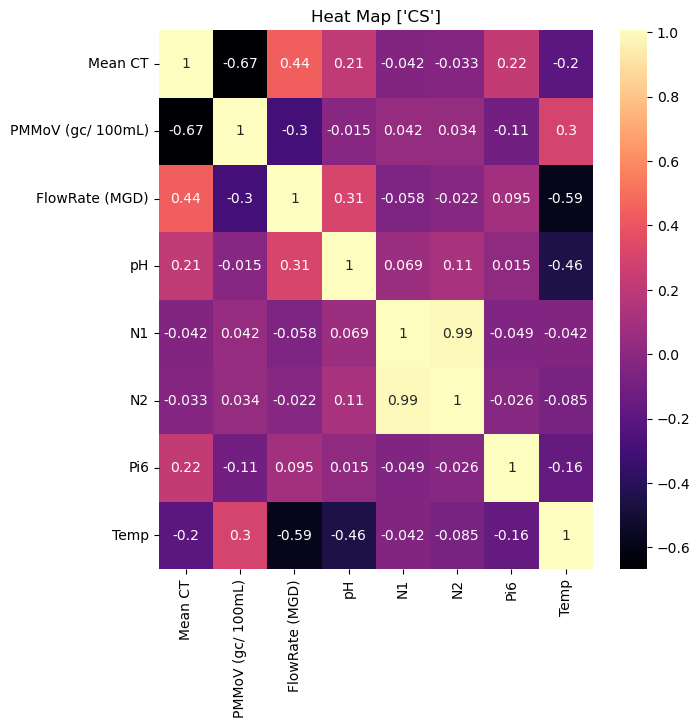

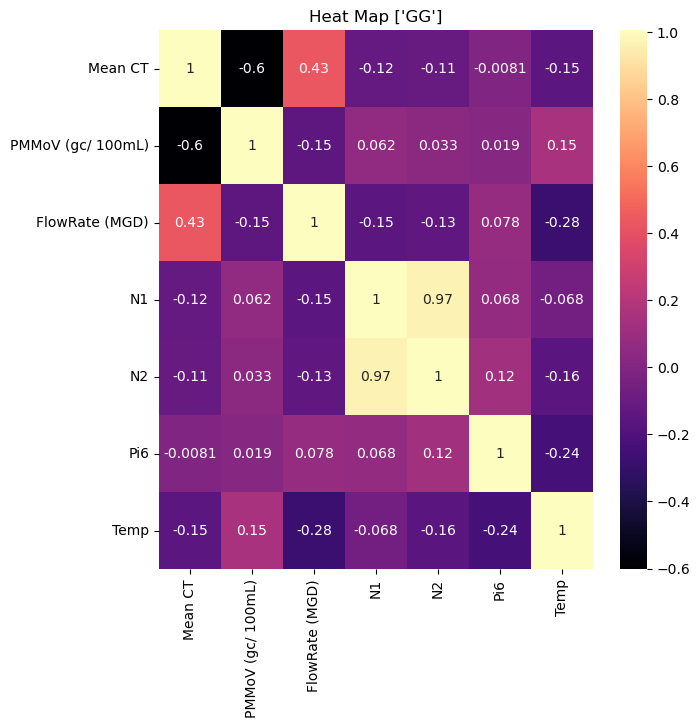

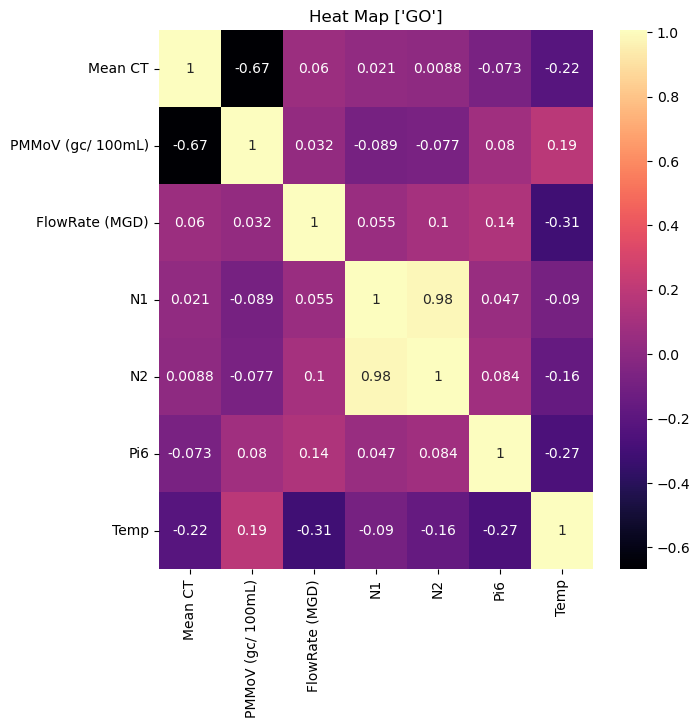

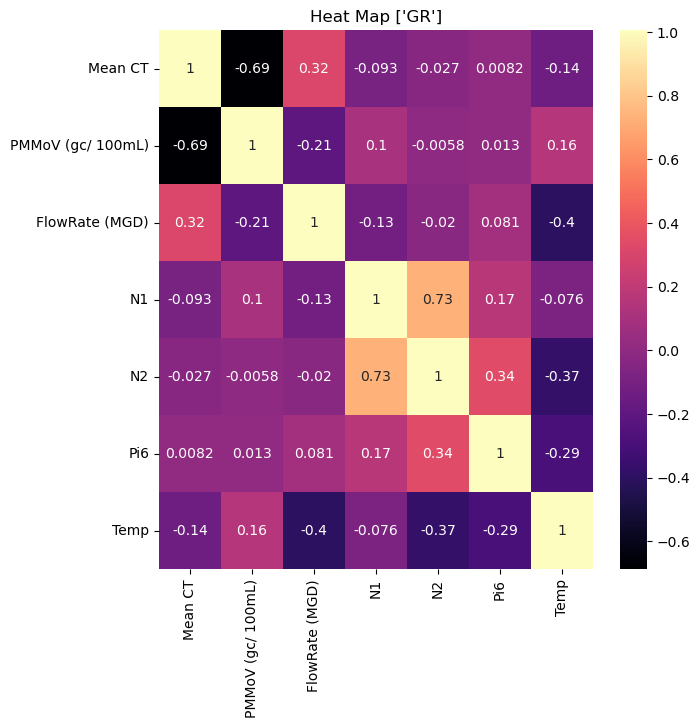

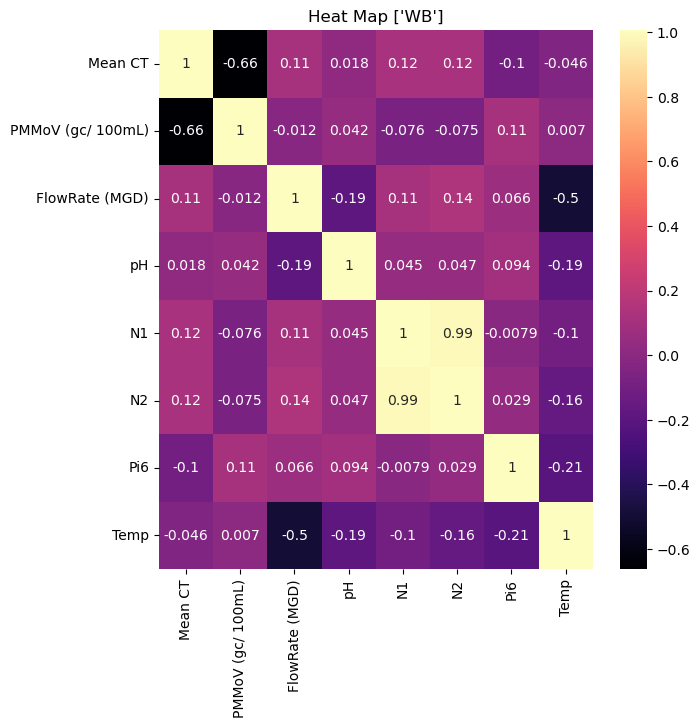

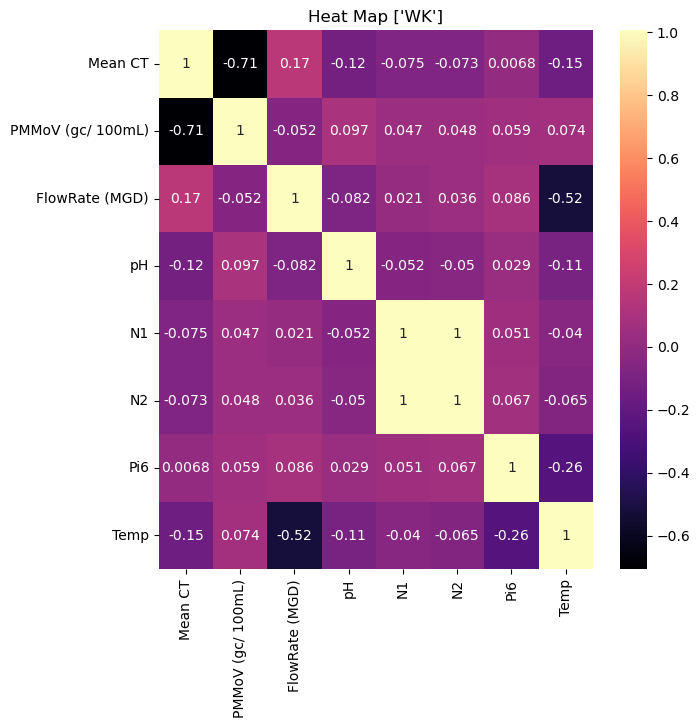

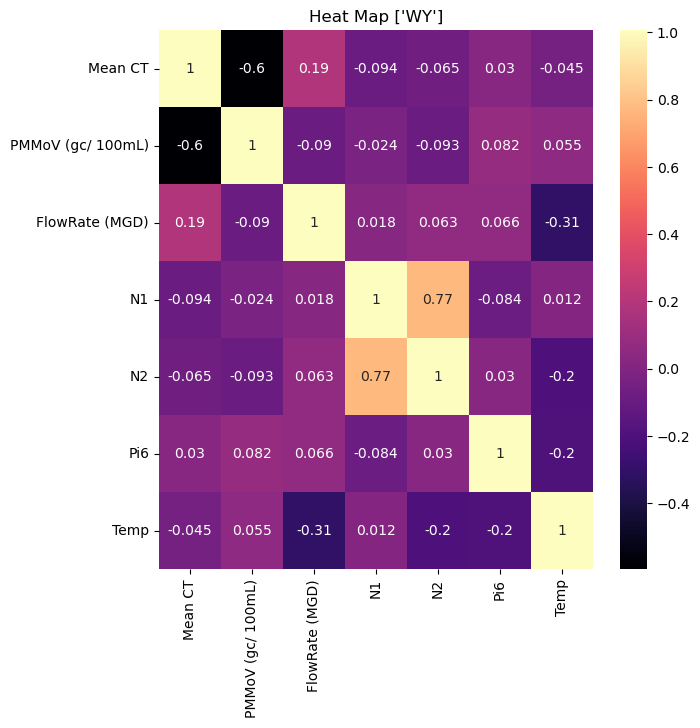

In [28]:
for idx, df in enumerate(dfs):
    # Drop columns of non-interest
    temp_df = df.drop(columns = ['Date','Code', 'PRCP (Rain fall in)','SNOW','SNWD (Snow Depth)','TMAX (Max Temp F)','TMIN (Min Temp F)','WT01 (Fog)','WT03 (Thunder)','Discharge (ft^3/s)'])
    # drop any missing info
    temp_df = temp_df.dropna()
    # create a cov matrix
    temp_scaled = StandardScaler().fit_transform(temp_df)
    temp_corr = np.cov(temp_scaled.T)
    # reintroduce column names
    temp_cov_heatmap = pd.DataFrame(temp_corr, columns = temp_df.columns)
    plt.figure(figsize=(7,7))
    plt.title(f"Heat Map {df['Code'].unique()}")
    sns.heatmap(temp_cov_heatmap, annot=True, cmap = 'magma', xticklabels=temp_cov_heatmap, yticklabels=temp_cov_heatmap)

General Cov Sructure in time
C(k, t) = Cov(X(t), X(t+k)) where k = lag steps -> C(k) = Cov((X+t), X(t+k))
ACF is lag corr? ACF is a shifting z-score
PACF Yule-Walker Equation
AR(p) Autoregression Order P where P is determined by PACF
VAR Vector Autoregression

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 167
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               164 non-null    datetime64[ns]
 1   Mean CT            163 non-null    float64       
 2   PMMoV (gc/ 100mL)  163 non-null    float64       
 3   FlowRate (MGD)     164 non-null    object        
 4   N1                 164 non-null    float64       
 5   N2                 164 non-null    float64       
 6   Pi6                158 non-null    float64       
 7   Temp               164 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 15.6+ KB


<Axes: xlabel='Date'>

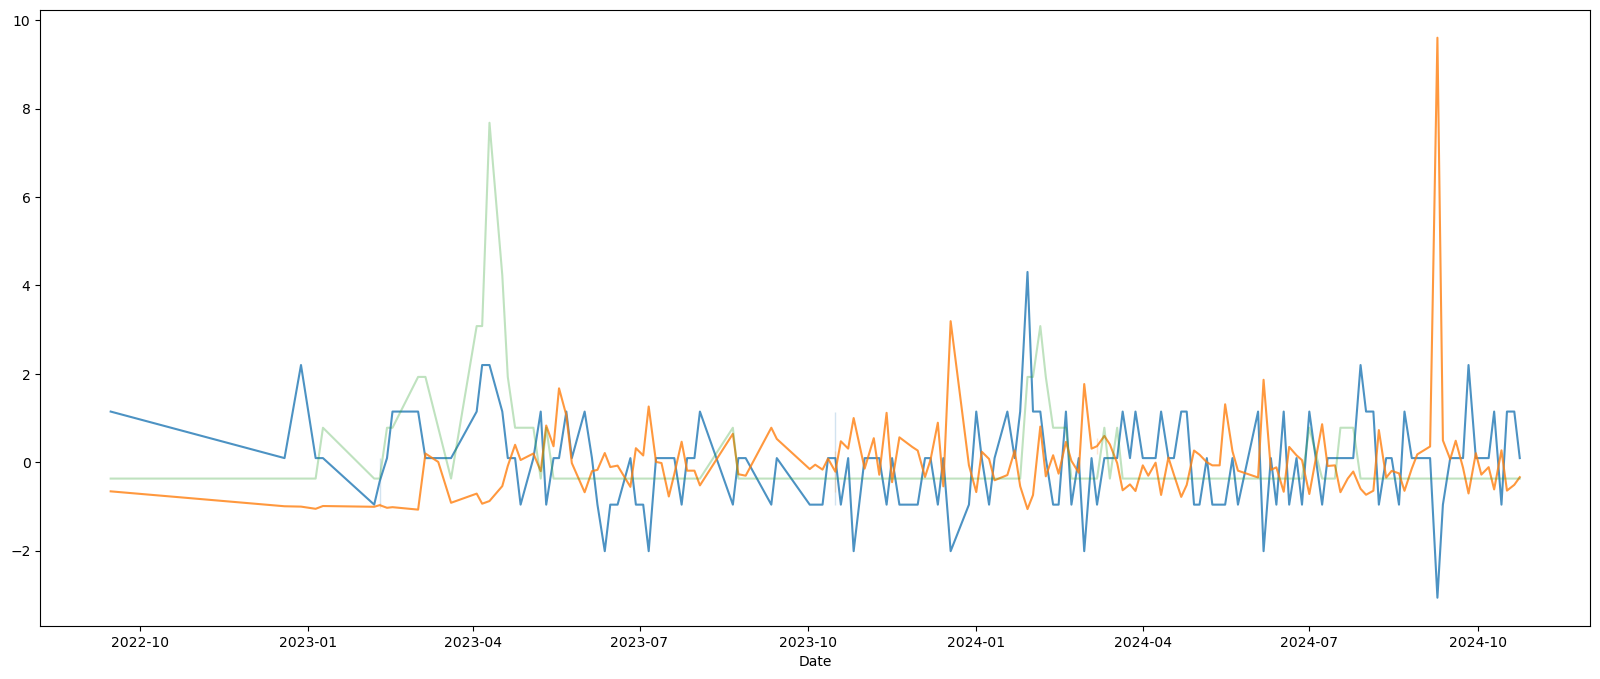

In [29]:
temp_data=dfs[1]
temp_data = temp_data. drop(columns = ['Code', 'PRCP (Rain fall in)','SNOW','SNWD (Snow Depth)','TMAX (Max Temp F)','TMIN (Min Temp F)','WT01 (Fog)','WT03 (Thunder)','Discharge (ft^3/s)'])
temp_data.info()
temp_data=temp_data.dropna()
temp_data_int = temp_data.drop(columns = ['Date'])
temp_scaled = StandardScaler().fit_transform(temp_data_int.astype(int))
plt.figure(figsize= (20,8))
sns.lineplot(y = temp_scaled[:, 0],
             x = temp_data['Date'],
             alpha = 0.8)
sns.lineplot(y = temp_scaled[:, 1],
             x = temp_data['Date'],
             alpha = 0.8)
sns.lineplot(y = temp_scaled[:, 2],
             x = temp_data['Date']
             ,alpha = 0.3)

I need to identify any correlation between outliers. Are outliers correlated between sites or is the outlier site specific. Dose PMMoV trend together between sites and if so, what causes these trends?

I believe there is some unrecorded element that correlates the PMMoV between sites that causes co-fluctuations of the data. My reasoning, I do not people defecate synchronously.

<Axes: title={'center': 'Heat Map PMMoV only'}>

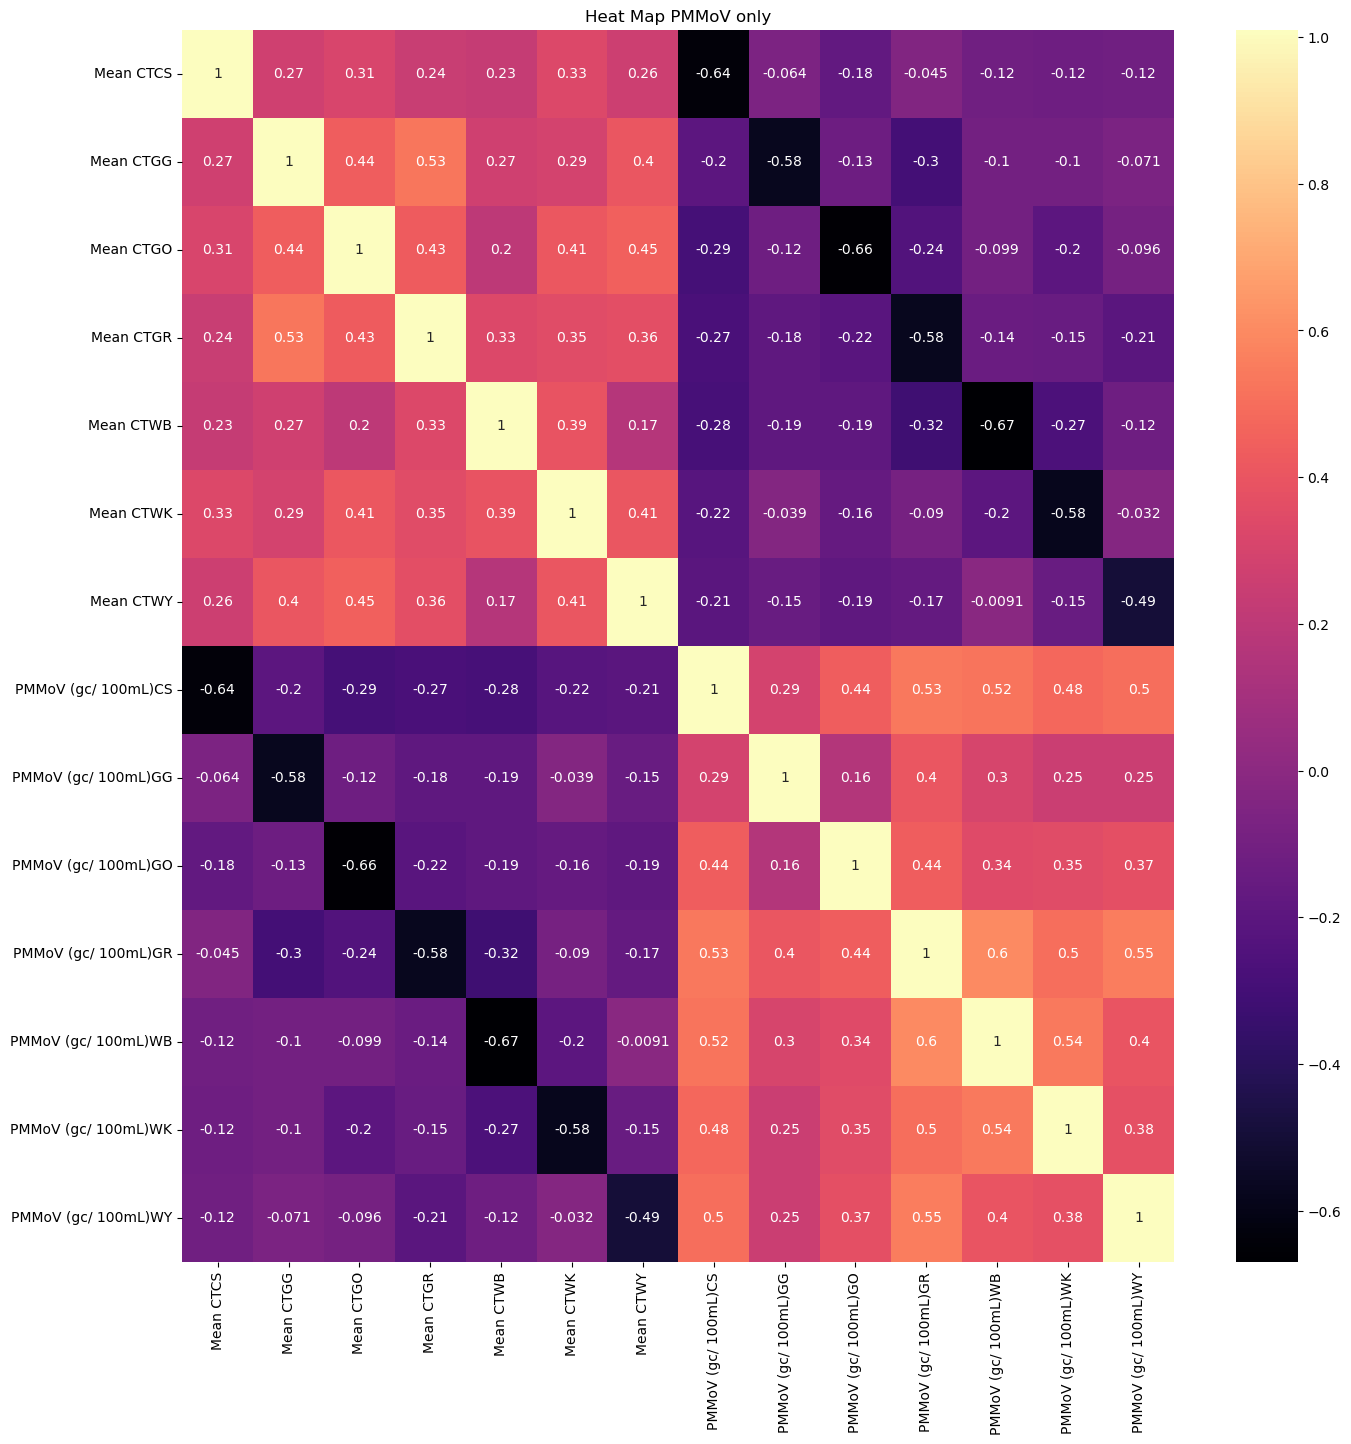

In [30]:
# Make a new df that only consist of MeanCT and PMMoV across all available sites

PMMoV_only_df = pd.DataFrame()
PMMoV_only_df['Date'] = pd.date_range(start='6/1/2022', end='10/27/2024')

# Iterate through the list of DataFrames
for idx, df in enumerate(dfs):
    temp_df = df.copy()
    
    code_value = df['Code'].unique()[0]
    

    temp_df[f'Mean CT{code_value}'] = df['Mean CT']
    
    PMMoV_only_df = PMMoV_only_df.merge(temp_df[['Date', f'Mean CT{code_value}']], 
                                         on='Date', how='outer')

for idx, df in enumerate(dfs):
    temp_df = df.copy()
    
    code_value = df['Code'].unique()[0]
    
    temp_df[f'PMMoV (gc/ 100mL){code_value}'] = df['PMMoV (gc/ 100mL)']
    
    # Merge the temp_df into PMMoV_only_df on the 'Date' column
    PMMoV_only_df = PMMoV_only_df.merge(temp_df[['Date', f'PMMoV (gc/ 100mL){code_value}']], 
                                         on='Date', how='outer') 

PMMoV_only_df = PMMoV_only_df.dropna()
PMMoV_only_df = PMMoV_only_df.drop_duplicates().reset_index()
PMMoV_only_df = PMMoV_only_df.drop(columns='index')
PMMoV_only_df = PMMoV_only_df.drop_duplicates(subset='Date', keep='first').reset_index()
PMMoV_only_df = PMMoV_only_df.drop(columns='index')

# Now we make a cov matrix of the data
PMMoV_only_df_int = PMMoV_only_df.drop(columns=["Date"])
PMMoV_only_df_int

PMMoV_scaled = StandardScaler().fit_transform(PMMoV_only_df_int)
PMMoV_corr = np.cov(PMMoV_scaled.T)
# reintroduce column names
PMMoV_corr = pd.DataFrame(PMMoV_corr, columns = PMMoV_only_df_int.columns)
plt.figure(figsize=(16,16))
plt.title(f"Heat Map PMMoV only")
sns.heatmap(PMMoV_corr, annot=True, cmap = 'magma', xticklabels=PMMoV_corr, yticklabels=PMMoV_corr)


In [31]:
import plotly.graph_objects as go

# Create the scatter plot
fig = go.Figure()

for col in PMMoV_only_df.columns:
    if col != 'Date':  # Skip the Date column
        fig.add_trace(go.Scatter(
            x=PMMoV_only_df['Date'], 
            y=PMMoV_only_df[col],
            mode='markers',  # Use 'markers' to display the data points
            name=col  # Name for the legend
        ))

# Customize layout
fig.update_layout(
    title="Scaled PMMoV and Mean CT Values Over Time",
    xaxis_title="Date",
    yaxis_title="Scaled Value",
    template="plotly_dark",
    hovermode="closest"  # Display the closest data point on hover
    )


The Heatmap above confirms my suspicions that PMMoV is of one site is correlated to the PMMoV of all available sites with in a county size geographical area. What I do not know is why PMMoV between sites are correlated to the degree that they are.

In [32]:
# hypothesis test to determine if a corelation exists between my sites PMMoV readings or if its all chance

# Chat gpt 4.0 mini (11/20/2024) target shuffling code
# Filter only numeric columns to avoid issues with non-numeric data like river names or codes
numeric_df = PMMoV_only_df.select_dtypes(include=[np.number])
# Step 1: Compute the observed correlation matrix
observed_corr = numeric_df.corr()
np.random.seed(0)
# Step 2: Run the Monte Carlo simulation
n_permutations = 10000
# generate a zero matrix for mater use
permuted_correlations = np.zeros((n_permutations, len(numeric_df.columns), len(numeric_df.columns)))

for i in range(n_permutations):
    permuted_df = numeric_df.copy()
    # Generate a new column of data using a random number that exists with in the original column
    for column in numeric_df.columns:
        permuted_df[column] = np.random.permutation(numeric_df[column])  # Shuffle each sites data
    # create a correlation matrix of the new data
    permuted_corr = permuted_df.corr()
    # append the new correlation matrix to a list of permutation matrices
    permuted_correlations[i] = permuted_corr

# Step 3: Calculate p-values for each pair of rivers
# Create a zero matrix the same shape as our original observed_corr matrix
p_values = np.zeros_like(observed_corr)
# move across columns from row i
for i in range(len(numeric_df.columns)):
    # move down column j
    for j in range(len(numeric_df.columns)):
        # Compute the original observed correlation
        observed_value = observed_corr.iloc[i, j]

        # Calculate the p-value by comparing the observed value to the permuted distribution
        p_value = np.mean(np.abs(permuted_correlations[:, i, j]) >= np.abs(observed_value))
        p_values[i, j] = p_value

# Step 4: Visualize p-values
p_value_df = pd.DataFrame(p_values, columns=numeric_df.columns, index=numeric_df.columns)

<Axes: title={'center': 'Target Shuffling PMMoV'}>

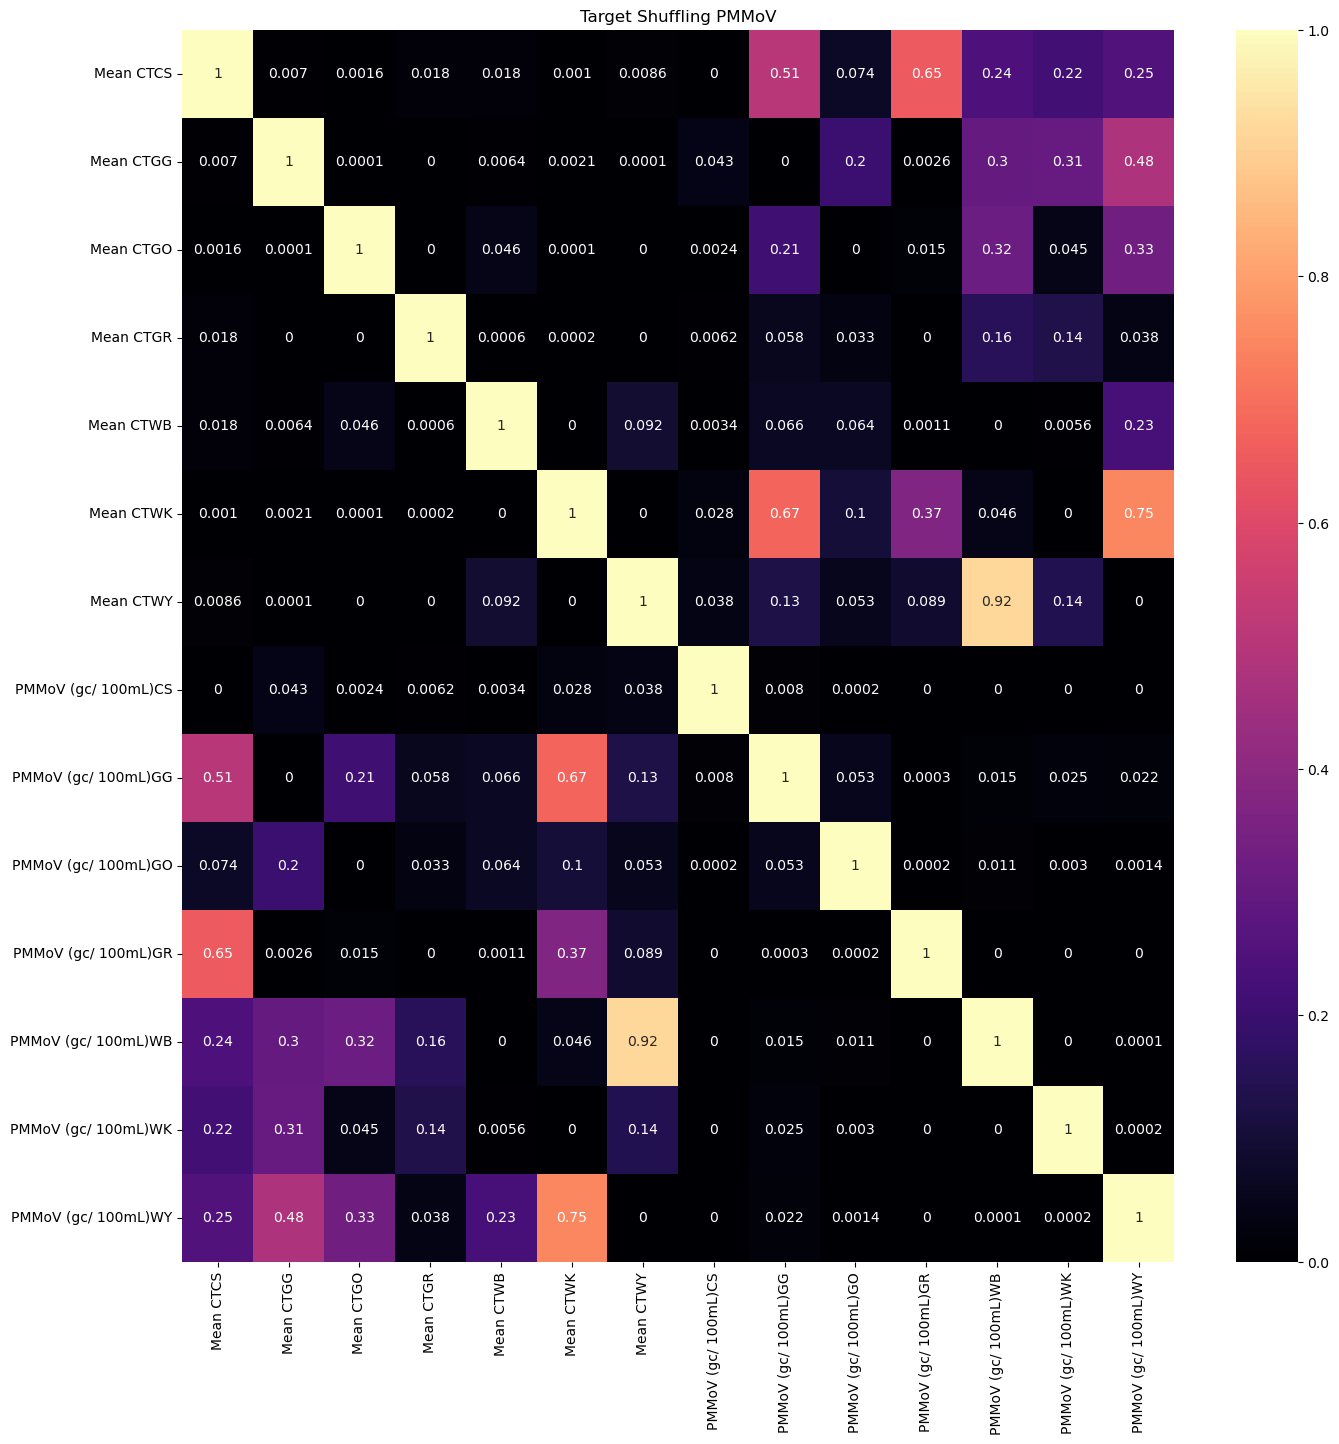

In [33]:
plt.figure(figsize=(16,16))
plt.title(f"Target Shuffling PMMoV")
sns.heatmap(p_value_df, annot=True, cmap = 'magma', xticklabels=p_value_df, yticklabels=p_value_df)

 The target shuffling moves data around with the assumption that data is all noise. Each block in the matrix represents the number of times the synthetic data correlation exceeds the observed data correlation between two columns. The value of each block is $\frac{N (Pcorr > Ocorr)}{total\ permutations}$. If the block is less that 0.05 then the columns are correlated. if data is more than 0.05 the columns are not correlated and corelation is due to random chance.

<Axes: title={'center': 'Heat Map PMMoV only'}>

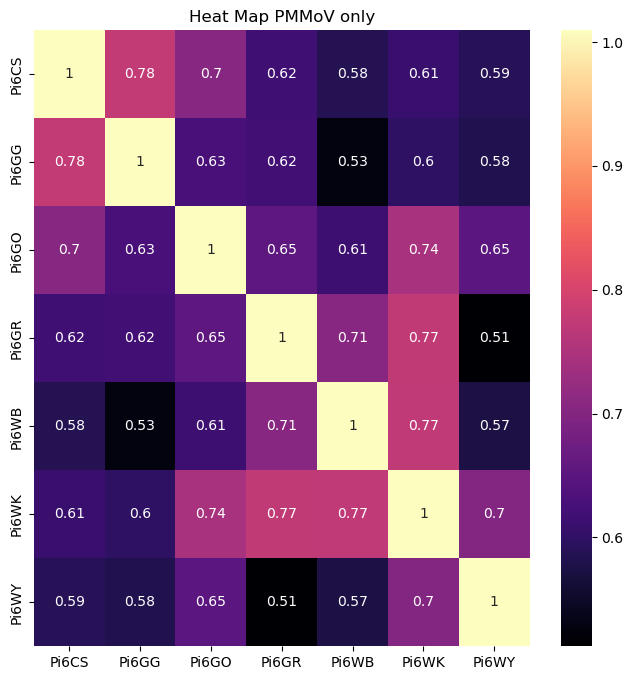

In [34]:
# determine if correlation is due to Pi6 noise
Pi6_only_df = pd.DataFrame()
Pi6_only_df['Date'] = pd.date_range(start='6/1/2022', end='10/27/2024')

# Iterate through the list of DataFrames
for idx, df in enumerate(dfs):
    temp_df = df.copy()
    
    code_value = df['Code'].unique()[0]
    

    temp_df[f'Pi6{code_value}'] = df['Pi6']
    
    Pi6_only_df = Pi6_only_df.merge(temp_df[['Date', f'Pi6{code_value}']], 
                                         on='Date', how='outer')

Pi6_only_df = Pi6_only_df.dropna()
Pi6_only_df = Pi6_only_df.drop_duplicates().reset_index()
Pi6_only_df_only_df = Pi6_only_df.drop(columns='index')
Pi6_only_df_only_df = Pi6_only_df.drop_duplicates(subset='Date', keep='first').reset_index()
Pi6_only_df = Pi6_only_df.drop(columns='index')

# Now we make a cov matrix of the data
Pi6_only_df_int = Pi6_only_df.drop(columns=["Date"])

Pi6_scaled = StandardScaler().fit_transform(Pi6_only_df_int)
Pi6_corr = np.cov(Pi6_scaled.T)
# reintroduce column names
Pi6_corr = pd.DataFrame(Pi6_corr, columns = Pi6_only_df_int.columns)
plt.figure(figsize=(8,8))
plt.title(f"Heat Map PMMoV only")
sns.heatmap(Pi6_corr, annot=True, cmap = 'magma', xticklabels=Pi6_corr, yticklabels=Pi6_corr)

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Ensure the 'Date' column is a datetime object
PMMoV_only_df['Date'] = pd.to_datetime(PMMoV_only_df['Date'])
# Set the 'Date' column as the index
PMMoV_only_df.set_index('Date', inplace=True)

<Figure size 2000x800 with 0 Axes>

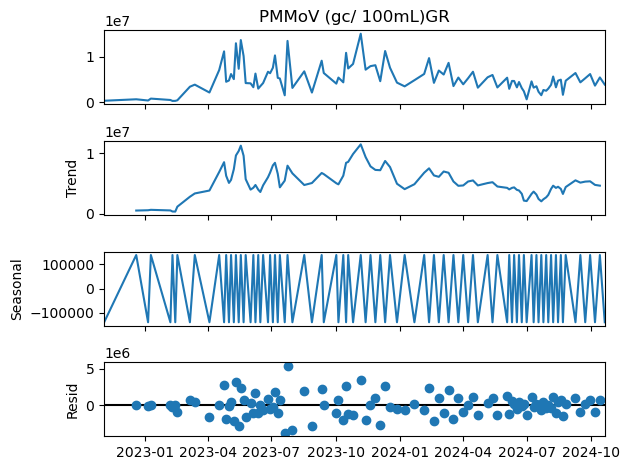

In [41]:
# Use only the 'Mean CTGR' column for decomposition
series = PMMoV_only_df['PMMoV (gc/ 100mL)GR']

# Perform seasonal decomposition
result = seasonal_decompose(series, model='additive', period= 2 )  # 'period' = 104 for annual 26 for seconal 8 for monthly and 2 for weekly

# Plot the decomposition result
plt.figure(figsize=(20,8))
result.plot()
plt.show()

So far I can not observe any overlying trends in the data. I got stuck here trying to explain what could be causing all of the data to be collated, so I went back and collected even more data from the lab.



In [37]:
lab_df.tail(40)
lab_df=lab_df.drop(columns= ['phi6 spiked', 'Notes'])
# remove numbers from text in Extractor column
lab_df['Extractor'] = lab_df['Extractor'].str.replace(r'[^a-zA-Z]', '', regex=True)
lab_df["qPCR Operator"] = lab_df["qPCR Operator"].str.replace(r'[^a-zA-Z]', '', regex=True)

In [38]:
lab_df
label_encoder = LabelEncoder()
lab_df["qPCR Operator"] = label_encoder.fit_transform(lab_df["qPCR Operator"])
lab_df['Extractor'] = label_encoder.fit_transform(lab_df['Extractor'])
lab_df

,Date,Site,sample type,pellet volume ml,Extractor,qPCR Operator,Date tested,Lag date
0,2022-09-15,CS,NaN,4,17,11,NaT,NaN
1,2022-09-15,GG,C,5,17,11,NaT,NaN
2,2022-09-15,GO,G,4.8,17,11,NaT,NaN
3,2022-11-03,CS,G,4.5,17,11,NaT,NaN
4,2022-11-03,GG,C,3.5,17,11,NaT,NaN
...,...,...,...,...,...,...,...,...
1112,2024-10-24,GO,G,7.5,4,4,2024-10-28,4.0
1113,2024-10-24,GR,C,5.3,4,4,2024-10-28,4.0
1114,2024-10-24,WB,G,7,4,4,2024-10-28,4.0
1115,2024-10-24,WK,G,5.5,4,4,2024-10-28,4.0


In [39]:
px.scatter(PMMoV_df, 
           title = 'sewer water PMMoV',
           x=PMMoV_df['Date'], 
           y=PMMoV_df['PMMoV (gc/ 100mL)'],
           color =PMMoV_df['Code'],
           template="plotly_dark",
           render_mode='svg')

In [40]:
px.scatter(lab_df, 
           title = 'Extraction pellet size',
           x=lab_df['Date'], 
           y=lab_df['Extractor'],
           color =lab_df['Site'],
           template="plotly_dark",
           render_mode='svg')